In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import math
import matplotlib.pylab as plab

import geopandas as gpd

from covid_time_series_prediction.data import data_raw
from covid_time_series_prediction.ml_logic.country_data import country_output

In [3]:
country = 'Germany'
#save_path = '/Users/albertogutierrez/code/albgutgam/Teky-Teka/covid_time_series_prediction/covid_time_series_prediction/data/data_raw_index'

path = '/Users/albertogutierrez/code/albgutgam/Teky-Teka/covid_time_series_prediction/covid_time_series_prediction/data/data_raw_index'

csv_path = os.path.join(path, f"data_{country}")

country_index = pd.read_csv(csv_path, index_col=False)

country_index.drop(columns = 'Unnamed: 0', inplace=True)

country_index['date']=pd.to_datetime(country_index['date'])


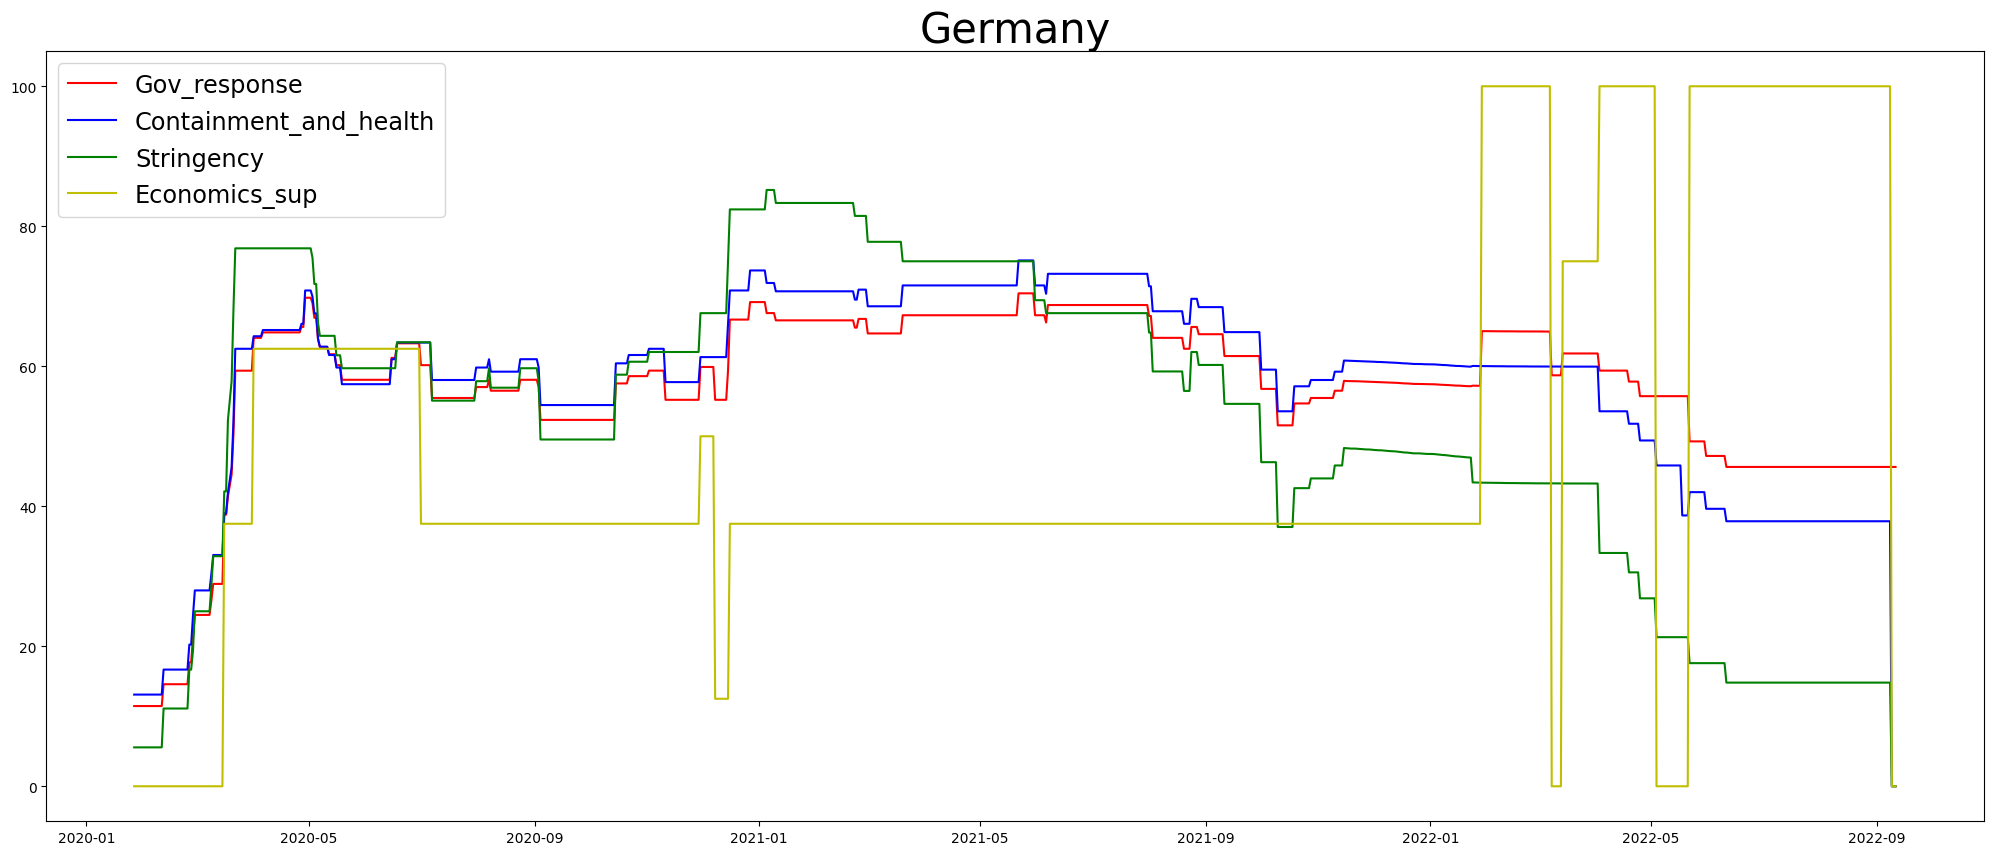

In [4]:
# Visualization Indexs
x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['gov_response']], color = 'r')
plt.plot(x, country_index[['containment_and_health']], color = 'b')
plt.plot(x, country_index[['stringency']], color = 'g')
plt.plot(x, country_index[['economics_sup']], color = 'y')
plt.title(country, fontsize=30)
plt.legend(['Gov_response','Containment_and_health','Stringency','Economics_sup'], fontsize='xx-large');

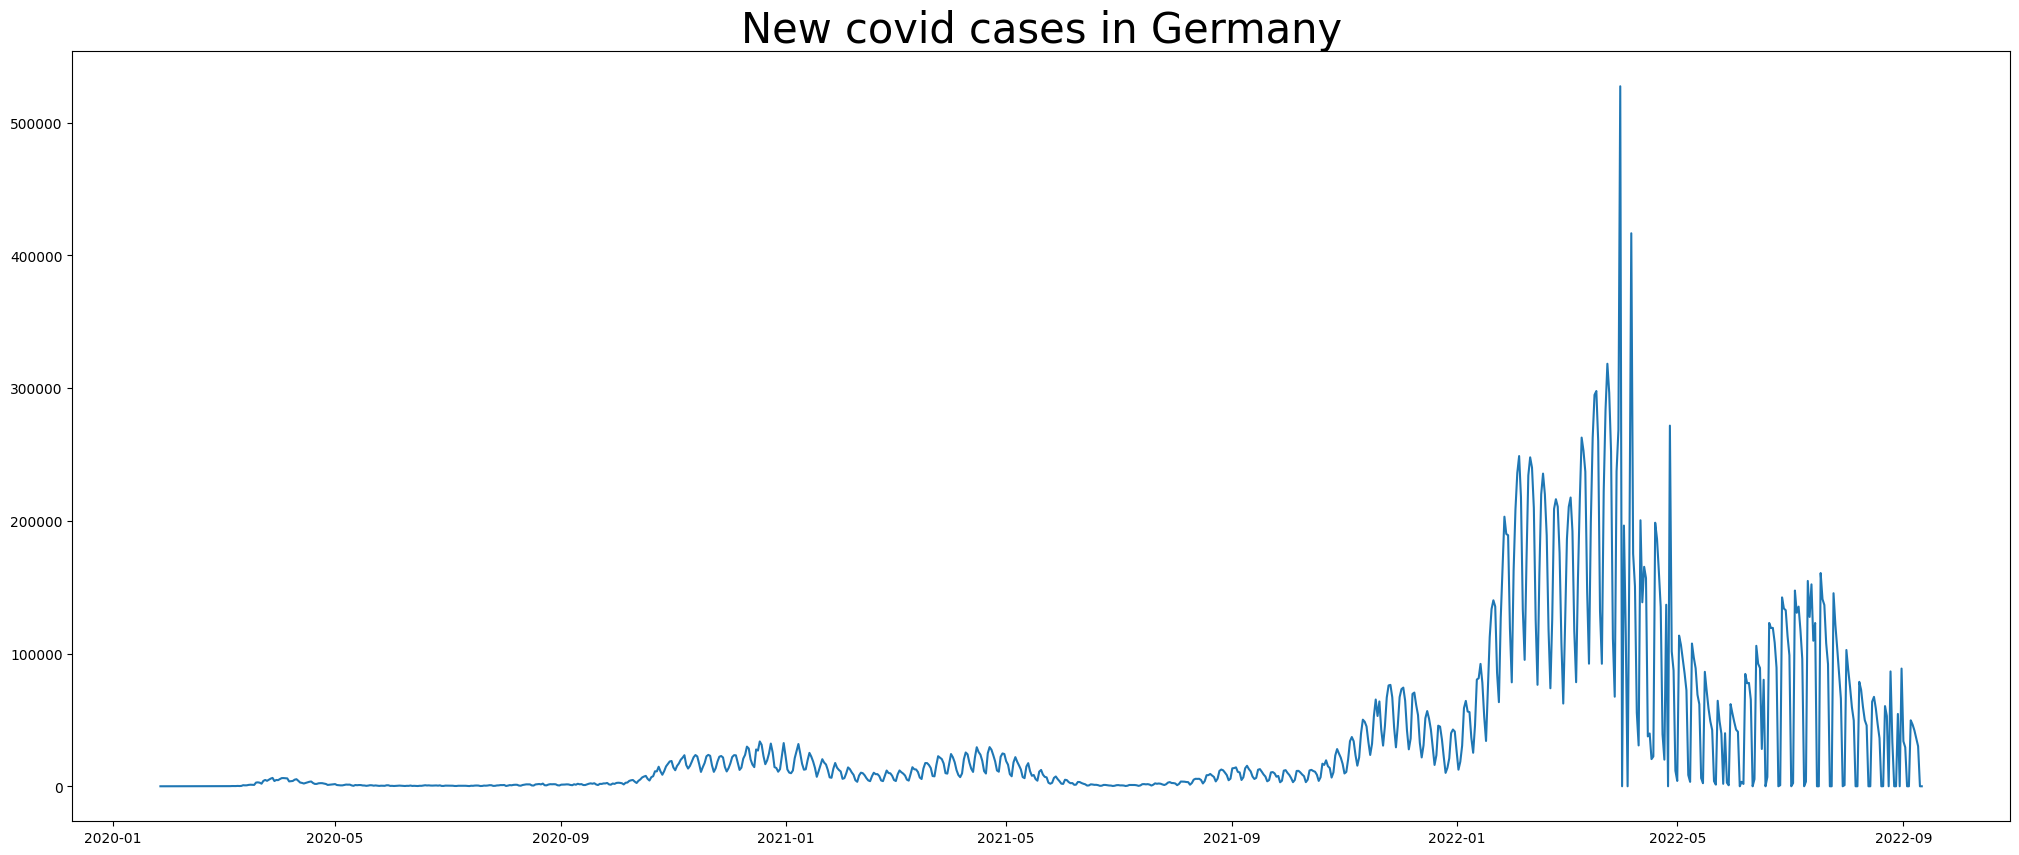

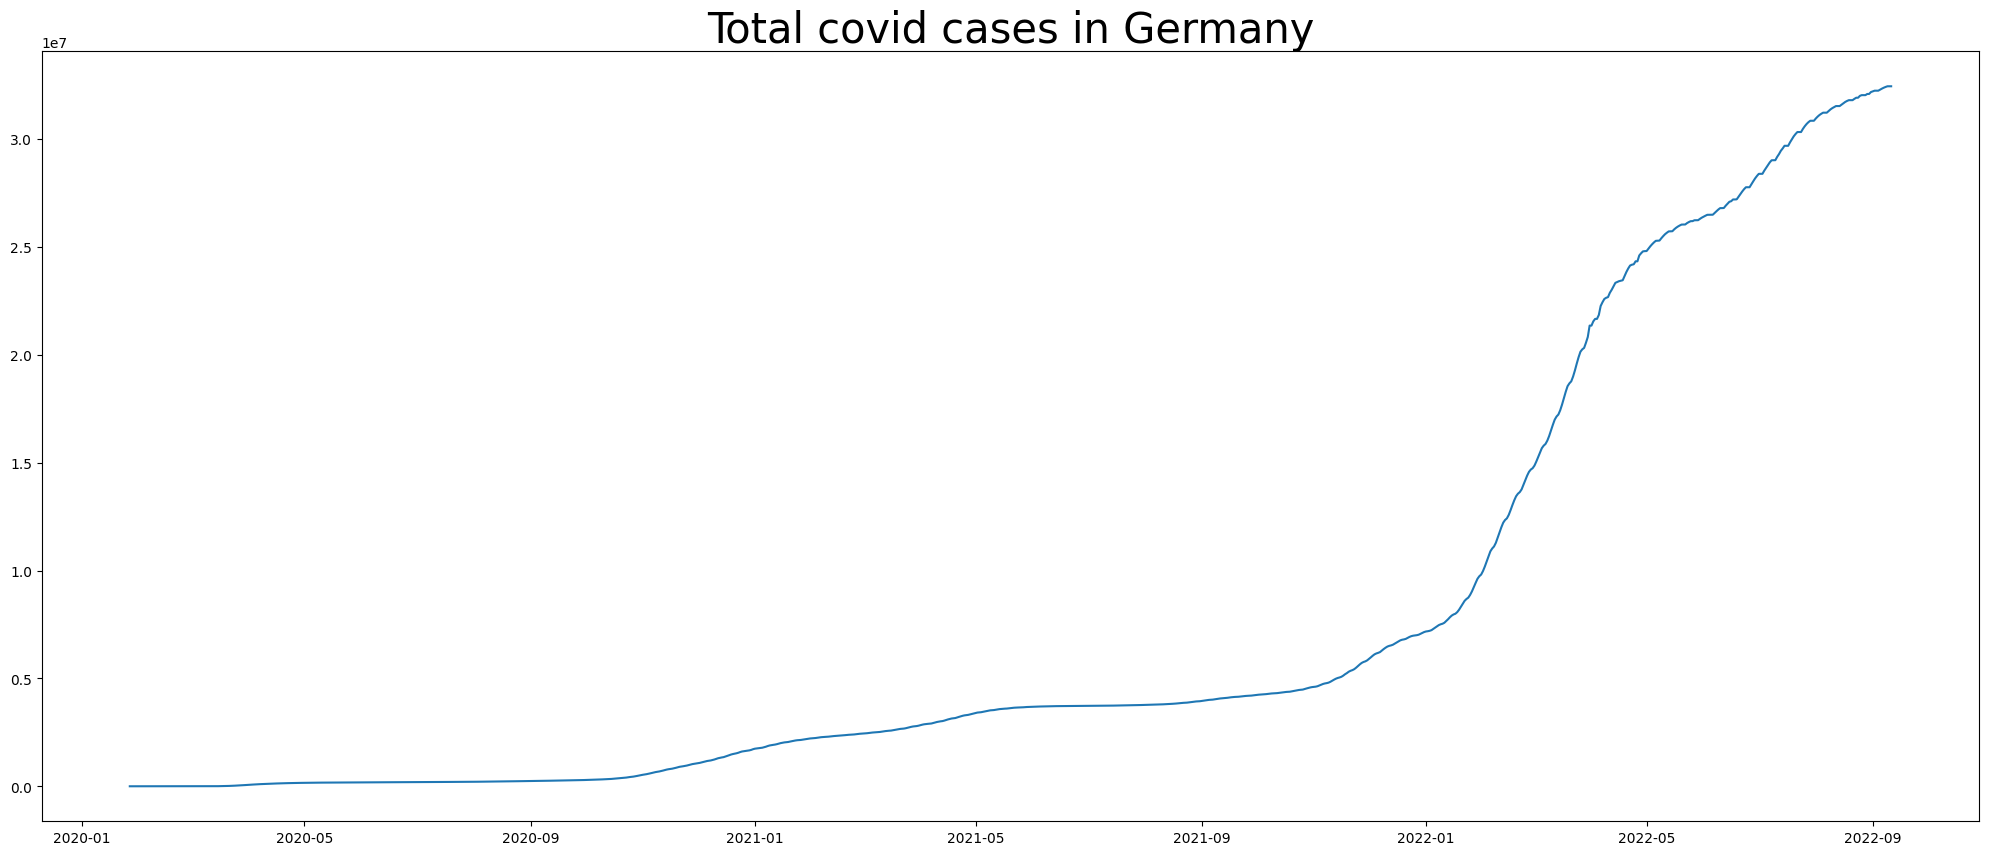

In [5]:
# Visualization new cases
x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['new_cases']]);
plt.title(f'New covid cases in {country}', fontsize=30);

# Visualization total cases
x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['total_cases']]);
plt.title(f'Total covid cases in {country}', fontsize=30);

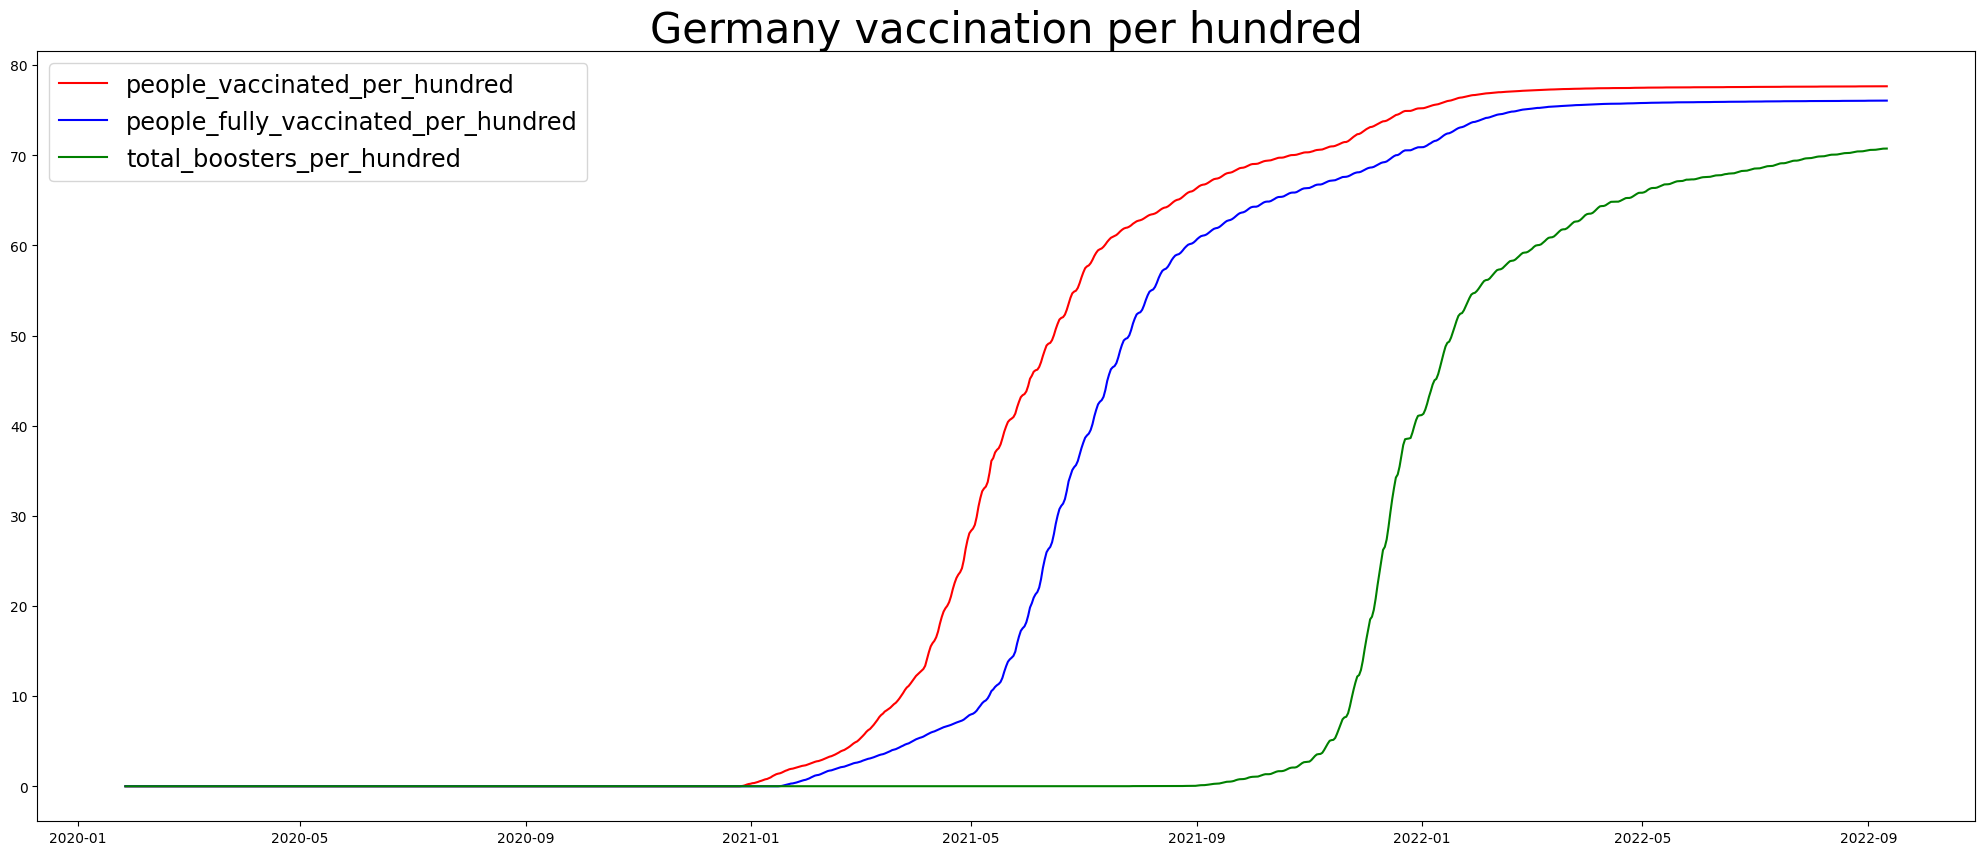

In [6]:
# Visualization Vaccination 

x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['people_vaccinated_per_hundred']], color = 'r')
plt.plot(x, country_index[['people_fully_vaccinated_per_hundred']], color = 'b')
plt.plot(x, country_index[['total_boosters_per_hundred']], color = 'g')
plt.title(f'{country} vaccination per hundred', fontsize=30)
plt.legend(['people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','total_boosters_per_hundred'], fontsize='xx-large');

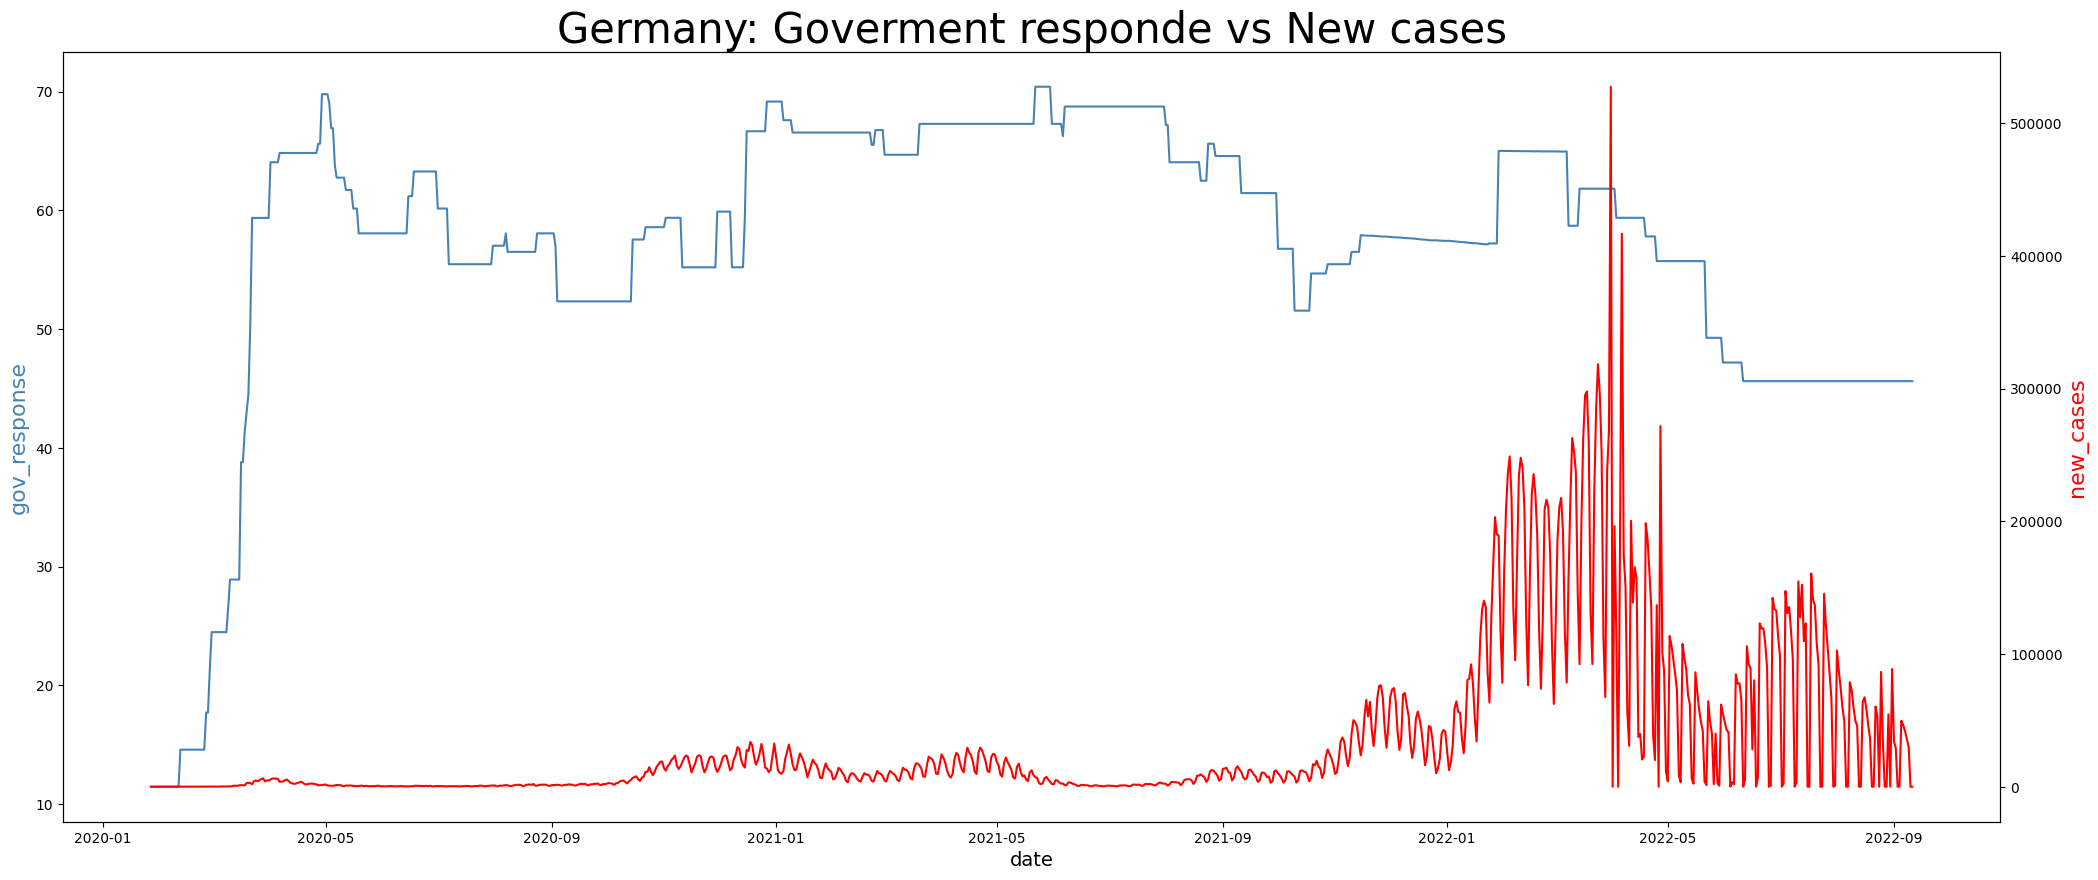

In [7]:
#define colors to use
col1 = 'steelblue'
col2 = 'red'

#define subplots
fig,ax = plt.subplots(figsize=(25,10))
#plt.fig(figsize=(25,10))

#add first line to plot
ax.plot(country_index.date, country_index.gov_response, color=col1)

#add x-axis label
ax.set_xlabel('date', fontsize=14)

#add y-axis label
ax.set_ylabel('gov_response', color=col1, fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(country_index.date, country_index.new_cases, color=col2)

#add second y-axis label
ax2.set_ylabel('new_cases', color=col2, fontsize=16);
plt.title(f'{country}: Goverment responde vs New cases', fontsize=30);

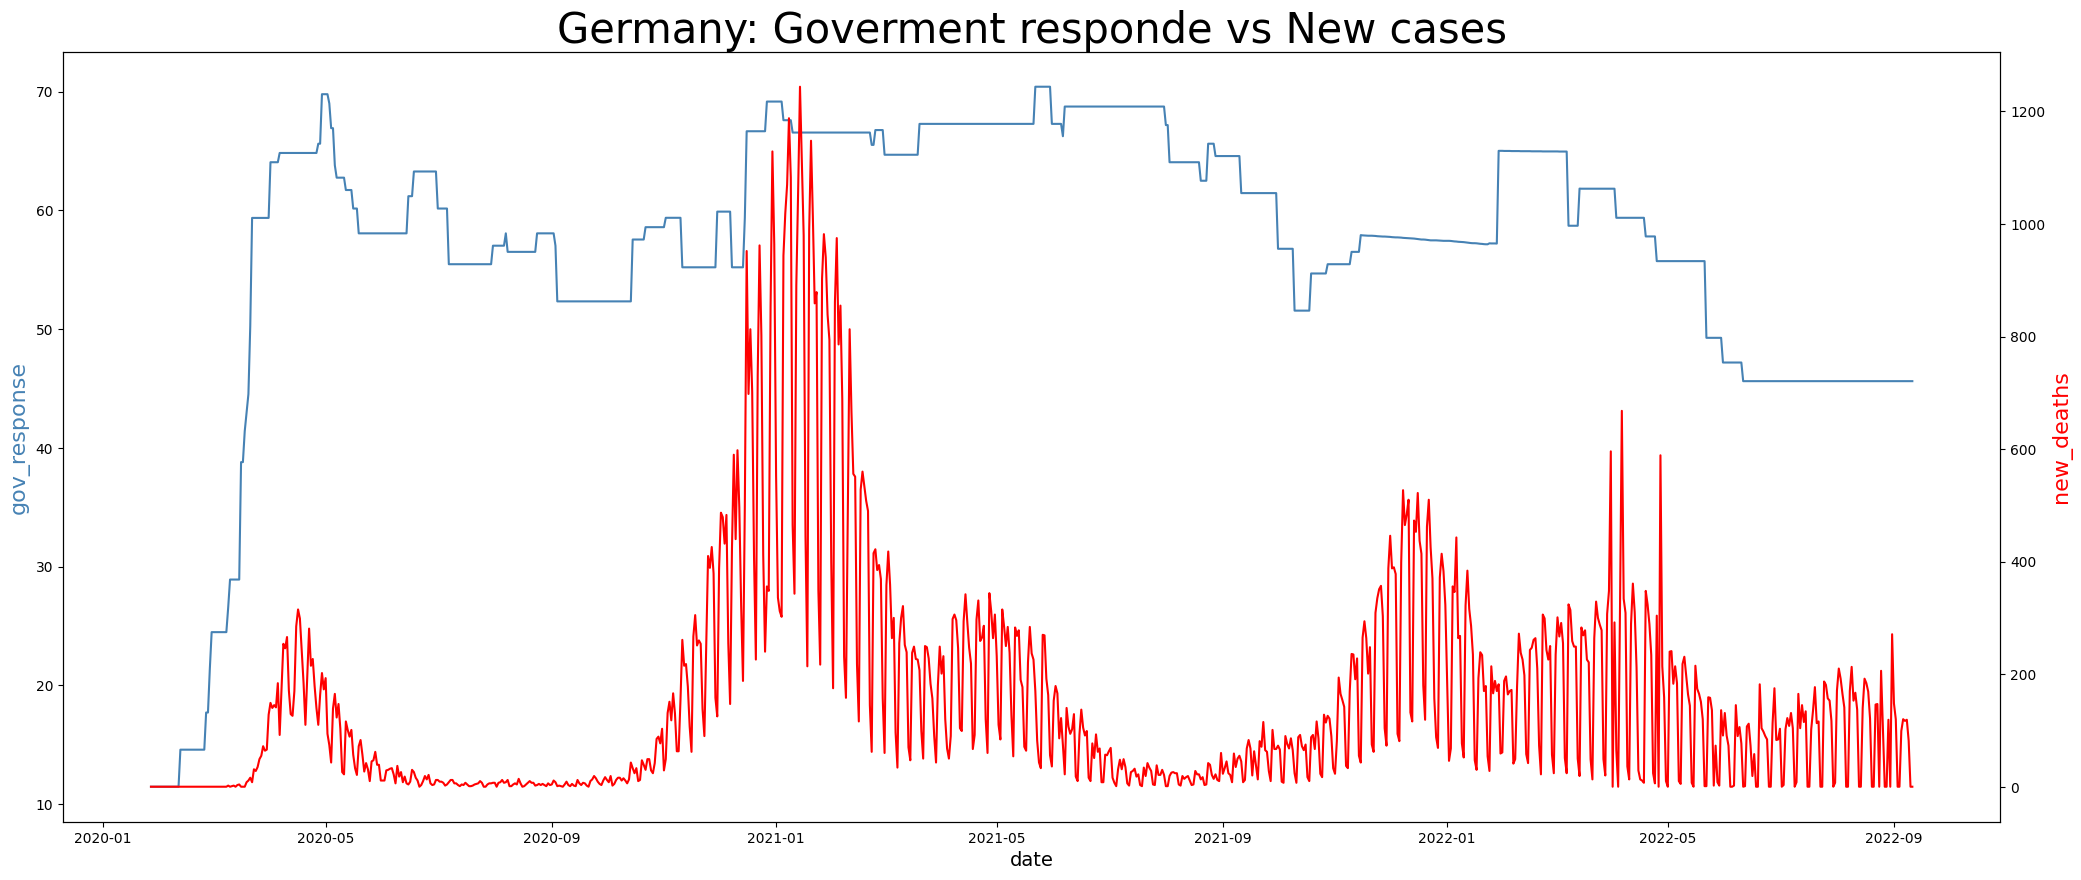

In [8]:
#define colors to use
col1 = 'steelblue'
col2 = 'red'

#define subplots
fig,ax = plt.subplots(figsize=(25,10))
#plt.fig(figsize=(25,10))

#add first line to plot
ax.plot(country_index.date, country_index.gov_response, color=col1)

#add x-axis label
ax.set_xlabel('date', fontsize=14)

#add y-axis label
ax.set_ylabel('gov_response', color=col1, fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(country_index.date, country_index.new_deaths, color=col2)

#add second y-axis label
ax2.set_ylabel('new_deaths', color=col2, fontsize=16);
plt.title(f'{country}: Goverment responde vs New cases', fontsize=30);

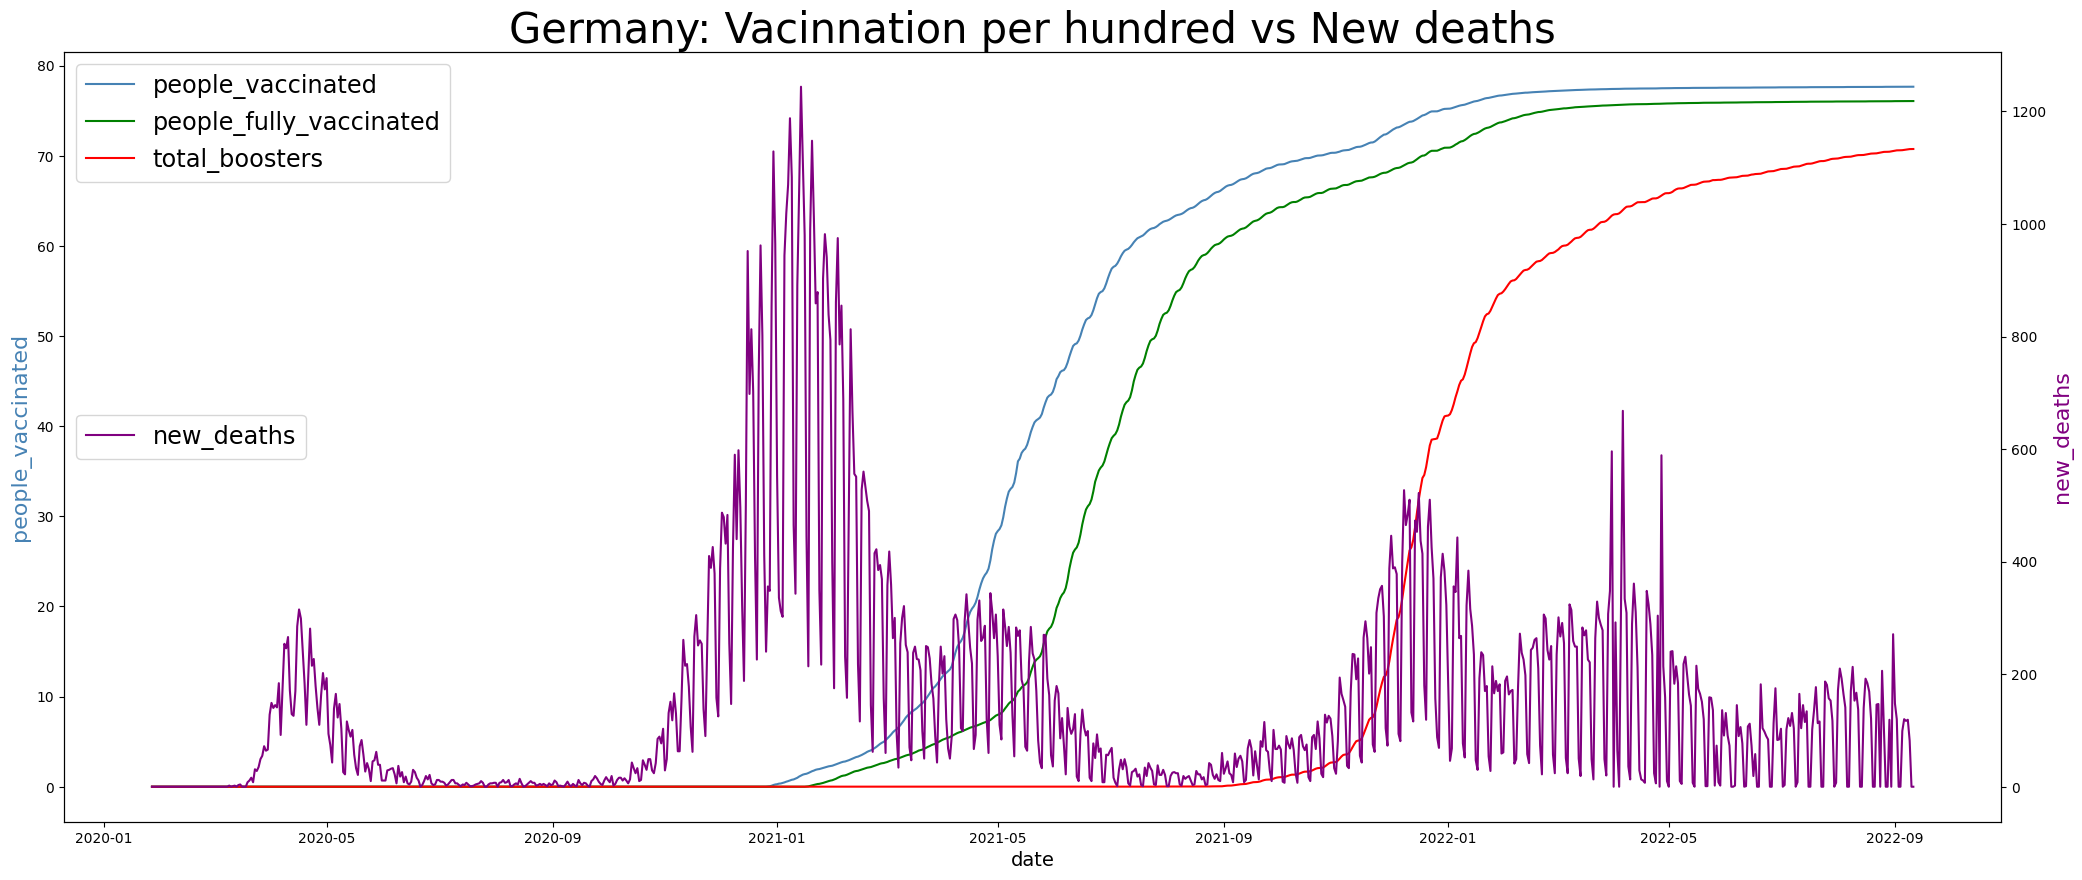

In [9]:
#define colors to use
col1 = 'steelblue'
col2 = 'green'
col3 = 'red'
col4 = 'purple'

#define subplots
fig,ax = plt.subplots(figsize=(25,10))
#plt.fig(figsize=(25,10))

#add first line to plot
ax.plot(country_index.date, country_index.people_vaccinated_per_hundred, color=col1)
ax.plot(country_index.date, country_index.people_fully_vaccinated_per_hundred, color=col2)
ax.plot(country_index.date, country_index.total_boosters_per_hundred, color=col3)

#add x-axis label
ax.set_xlabel('date', fontsize=14)

#add y-axis label
ax.set_ylabel('people_vaccinated', color=col1, fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(country_index.date, country_index.new_deaths, color=col4)

#add second y-axis label
ax2.set_ylabel('new_deaths', color=col4, fontsize=16)

ax.legend(['people_vaccinated','people_fully_vaccinated','total_boosters', 'new_deaths'],
          fontsize='xx-large', loc='best');
ax2.legend(['new_deaths'],
          fontsize='xx-large', loc='center left');
plt.title(f'{country}: Vacinnation per hundred vs New deaths', fontsize=30);

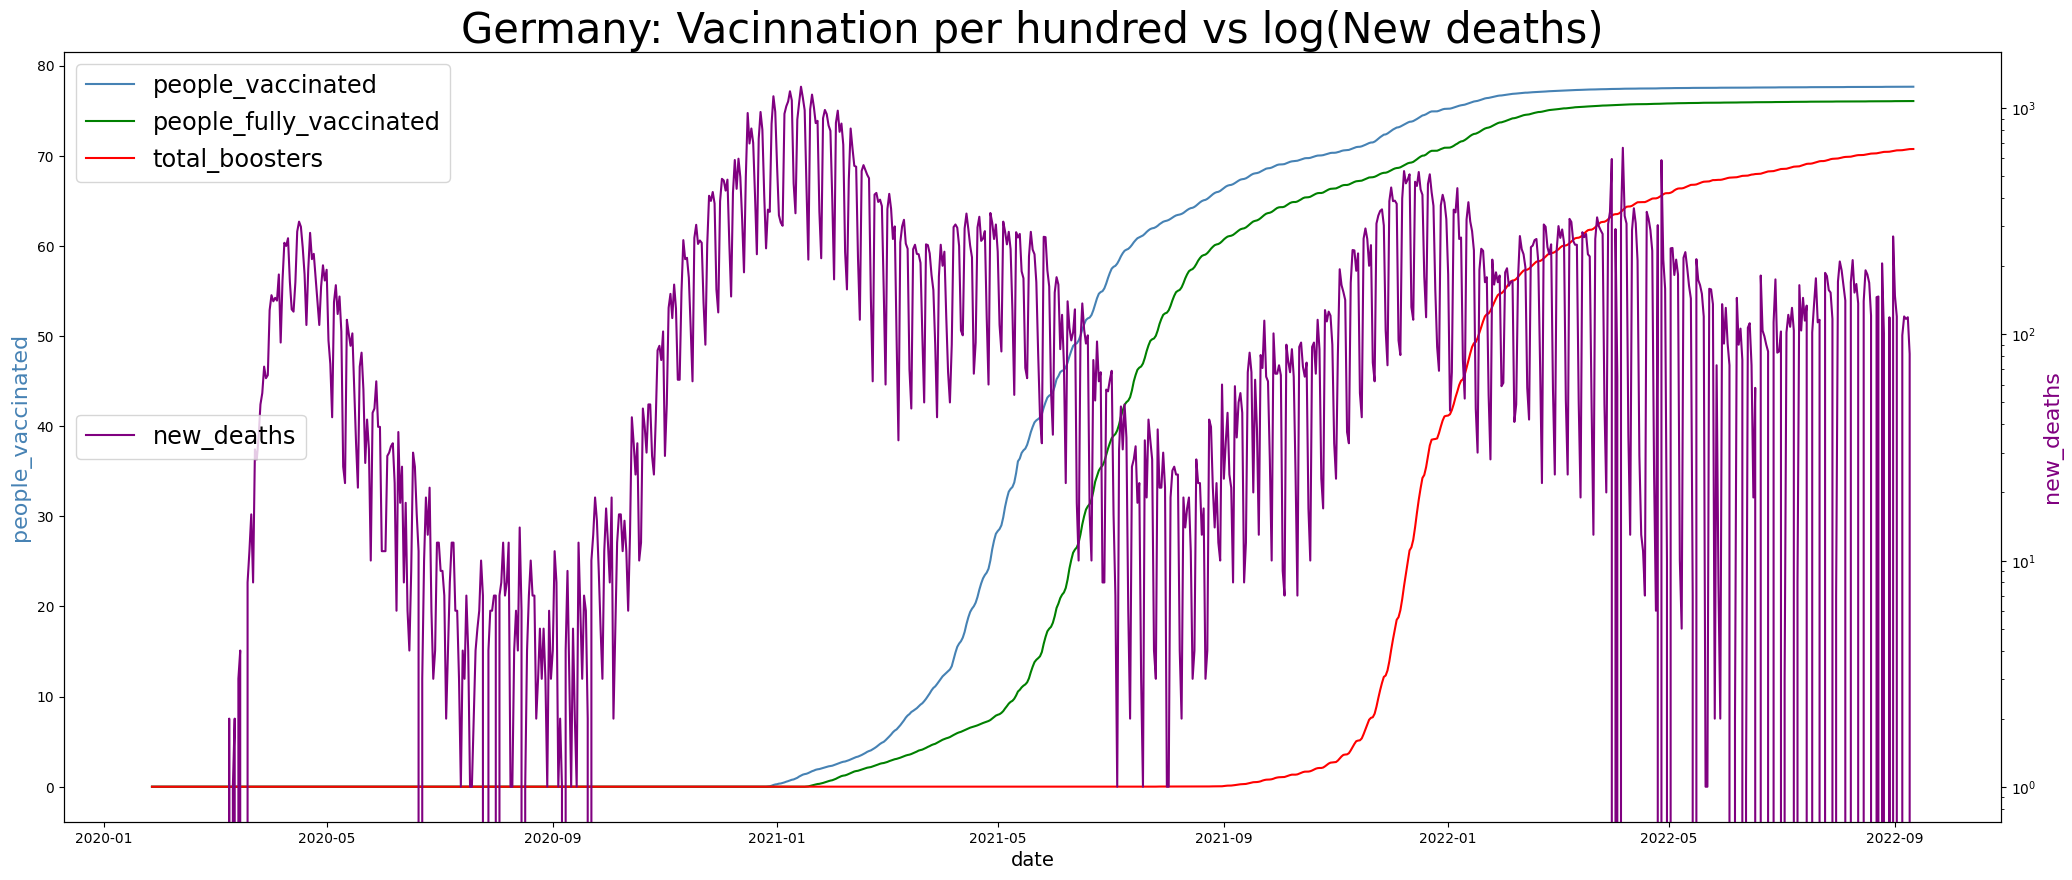

In [10]:
#define colors to use
col1 = 'steelblue'
col2 = 'green'
col3 = 'red'
col4 = 'purple'

#define subplots
fig,ax = plt.subplots(figsize=(25,10))
#plt.fig(figsize=(25,10))

#add first line to plot
ax.plot(country_index.date, country_index.people_vaccinated_per_hundred, color=col1)
ax.plot(country_index.date, country_index.people_fully_vaccinated_per_hundred, color=col2)
ax.plot(country_index.date, country_index.total_boosters_per_hundred, color=col3)

#add x-axis label
ax.set_xlabel('date', fontsize=14)

#add y-axis label
ax.set_ylabel('people_vaccinated', color=col1, fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(country_index.date, country_index.new_deaths, color=col4)
plt.yscale('log')

#add second y-axis label
ax2.set_ylabel('new_deaths', color=col4, fontsize=16)

ax.legend(['people_vaccinated','people_fully_vaccinated','total_boosters', 'new_deaths'],
          fontsize='xx-large', loc='best');
ax2.legend(['new_deaths'],
          fontsize='xx-large', loc='center left');
plt.title(f'{country}: Vacinnation per hundred vs log(New deaths)', fontsize=30);

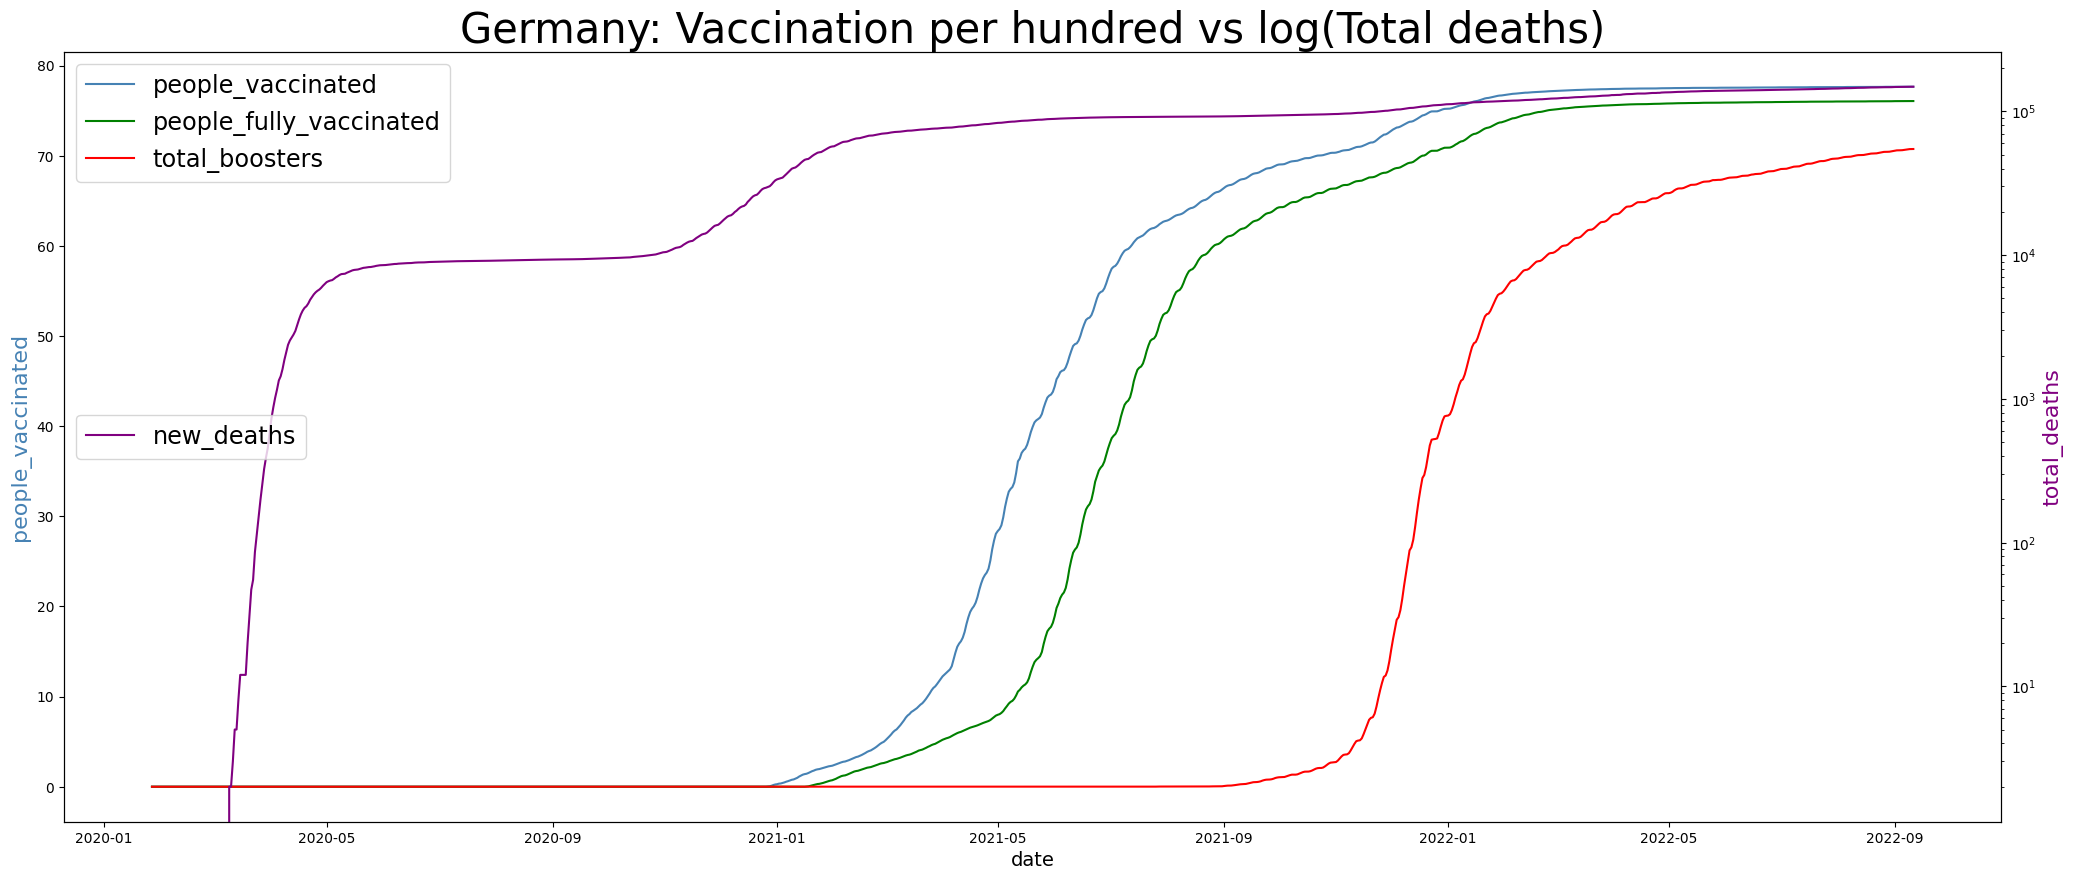

In [11]:
#define colors to use
col1 = 'steelblue'
col2 = 'green'
col3 = 'red'
col4 = 'purple'

#define subplots
fig,ax = plt.subplots(figsize=(25,10))
#plt.fig(figsize=(25,10))

#add first line to plot
ax.plot(country_index.date, country_index.people_vaccinated_per_hundred, color=col1)
ax.plot(country_index.date, country_index.people_fully_vaccinated_per_hundred, color=col2)
ax.plot(country_index.date, country_index.total_boosters_per_hundred, color=col3)

#add x-axis label
ax.set_xlabel('date', fontsize=14)

#add y-axis label
ax.set_ylabel('people_vaccinated', color=col1, fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(country_index.date, country_index.total_deaths, color=col4)
plt.yscale('log')

#add second y-axis label
ax2.set_ylabel('total_deaths', color=col4, fontsize=16)

ax.legend(['people_vaccinated','people_fully_vaccinated','total_boosters', 'new_deaths'],
          fontsize='xx-large', loc='best');
ax2.legend(['new_deaths'],
          fontsize='xx-large', loc='center left');
plt.title(f'{country}: Vaccination per hundred vs log(Total deaths)', fontsize=30);

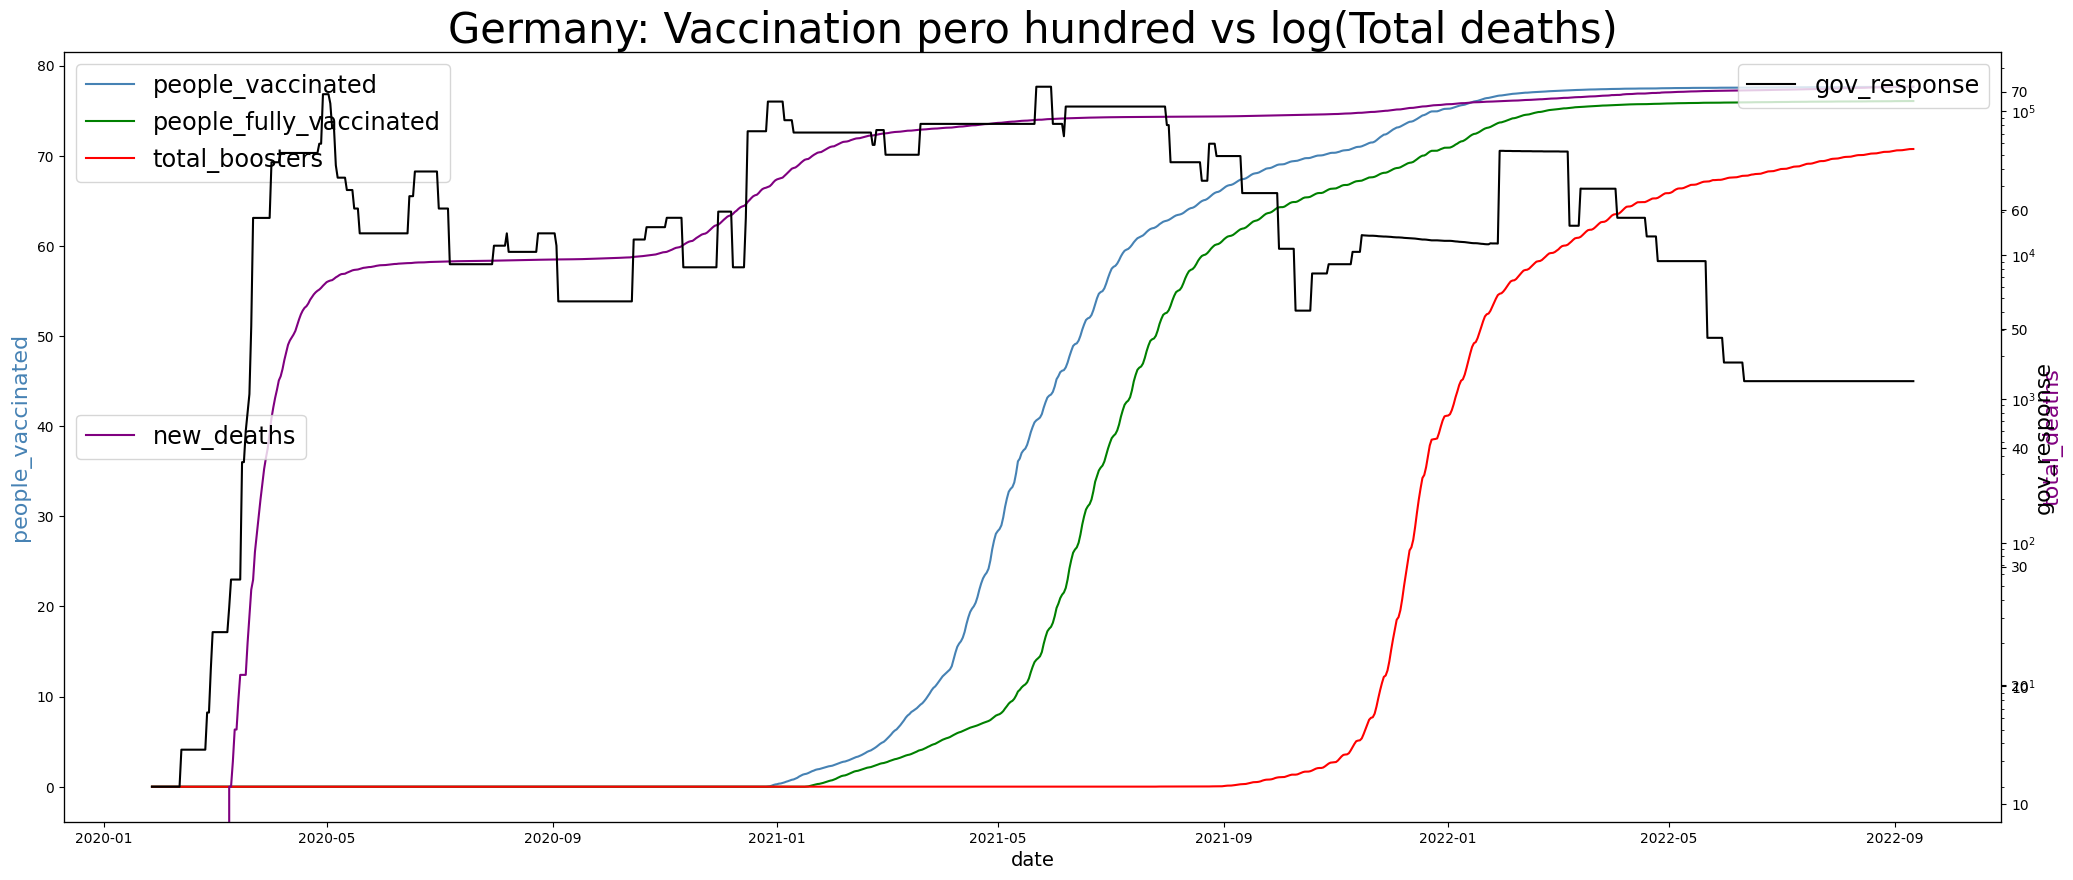

In [12]:
#define colors to use
col1 = 'steelblue'
col2 = 'green'
col3 = 'red'
col4 = 'purple'
col5 = 'black'

#define subplots
fig,ax = plt.subplots(figsize=(25,10))
#plt.fig(figsize=(25,10))

#add first line to plot
ax.plot(country_index.date, country_index.people_vaccinated_per_hundred, color=col1,
       label = 'people_vaccinated')
ax.plot(country_index.date, country_index.people_fully_vaccinated_per_hundred, color=col2)
ax.plot(country_index.date, country_index.total_boosters_per_hundred, color=col3)

#add x-axis label
ax.set_xlabel('date', fontsize=14)

#add y-axis label
ax.set_ylabel('people_vaccinated', color=col1, fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(country_index.date, country_index.total_deaths, color=col4)
plt.yscale('log')

#add second y-axis label
ax2.set_ylabel('total_deaths', color=col4, fontsize=16)

ax.legend(['people_vaccinated','people_fully_vaccinated','total_boosters'],
          fontsize='xx-large', loc='best');
ax2.legend(['new_deaths'],
          fontsize='xx-large', loc='center left');

#define third y-axis that shares x-axis with current plot
ax3 = ax.twinx()

#add second line to plot
ax3.plot(country_index.date, country_index.gov_response, color=col5)

#add second y-axis label
ax3.set_ylabel('gov_response', color=col5, fontsize=16)

ax.legend(['people_vaccinated','people_fully_vaccinated','total_boosters', 'new_deaths'],
          fontsize='xx-large', loc='best');
ax2.legend(['new_deaths'],
          fontsize='xx-large', loc='center left');
ax3.legend(['gov_response'],
          fontsize='xx-large', loc='best');


plt.title(f'{country}: Vaccination pero hundred vs log(Total deaths)', fontsize=30);

AttributeError: 'list' object has no attribute 'yscale'

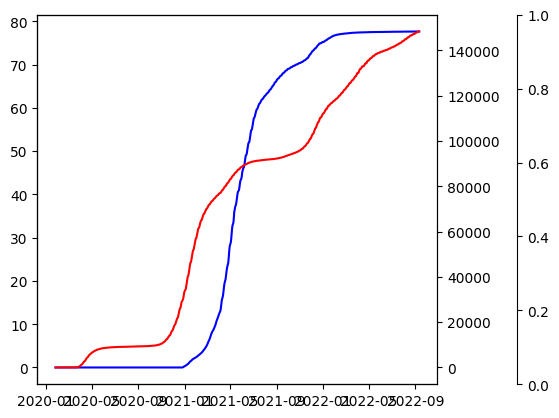

In [13]:
fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines.right.set_position(("axes", 1.2))

p1, = ax.plot(country_index.date, country_index.people_vaccinated_per_hundred, "b-", label="people_vaccinated")
p2, = twin1.plot(country_index.date, country_index.total_deaths, "r-", label="new_deaths").yscale('log')
p3, = twin2.plot(country_index.date, country_index.gov_response, "g-", label="gov_response")

ax.set_xlabel("people_vaccinated")
ax.set_ylabel("Density")
twin1.set_ylabel("Temperature")
twin2.set_ylabel("Velocity")

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

ax.legend(handles=[p1, p2, p3])

plt.show()

In [26]:
country = 'United States'
#save_path = '/Users/albertogutierrez/code/albgutgam/Teky-Teka/covid_time_series_prediction/covid_time_series_prediction/data/data_raw_index'

path = '/Users/albertogutierrez/code/albgutgam/Teky-Teka/covid_time_series_prediction/covid_time_series_prediction/data/data_raw'

csv_path = os.path.join(path, f"data_{country}")

country_indicator = pd.read_csv(csv_path, index_col=False)

country_indicator.drop(columns = 'Unnamed: 0', inplace=True)

country_indicator['date']=pd.to_datetime(country_indicator['date'])

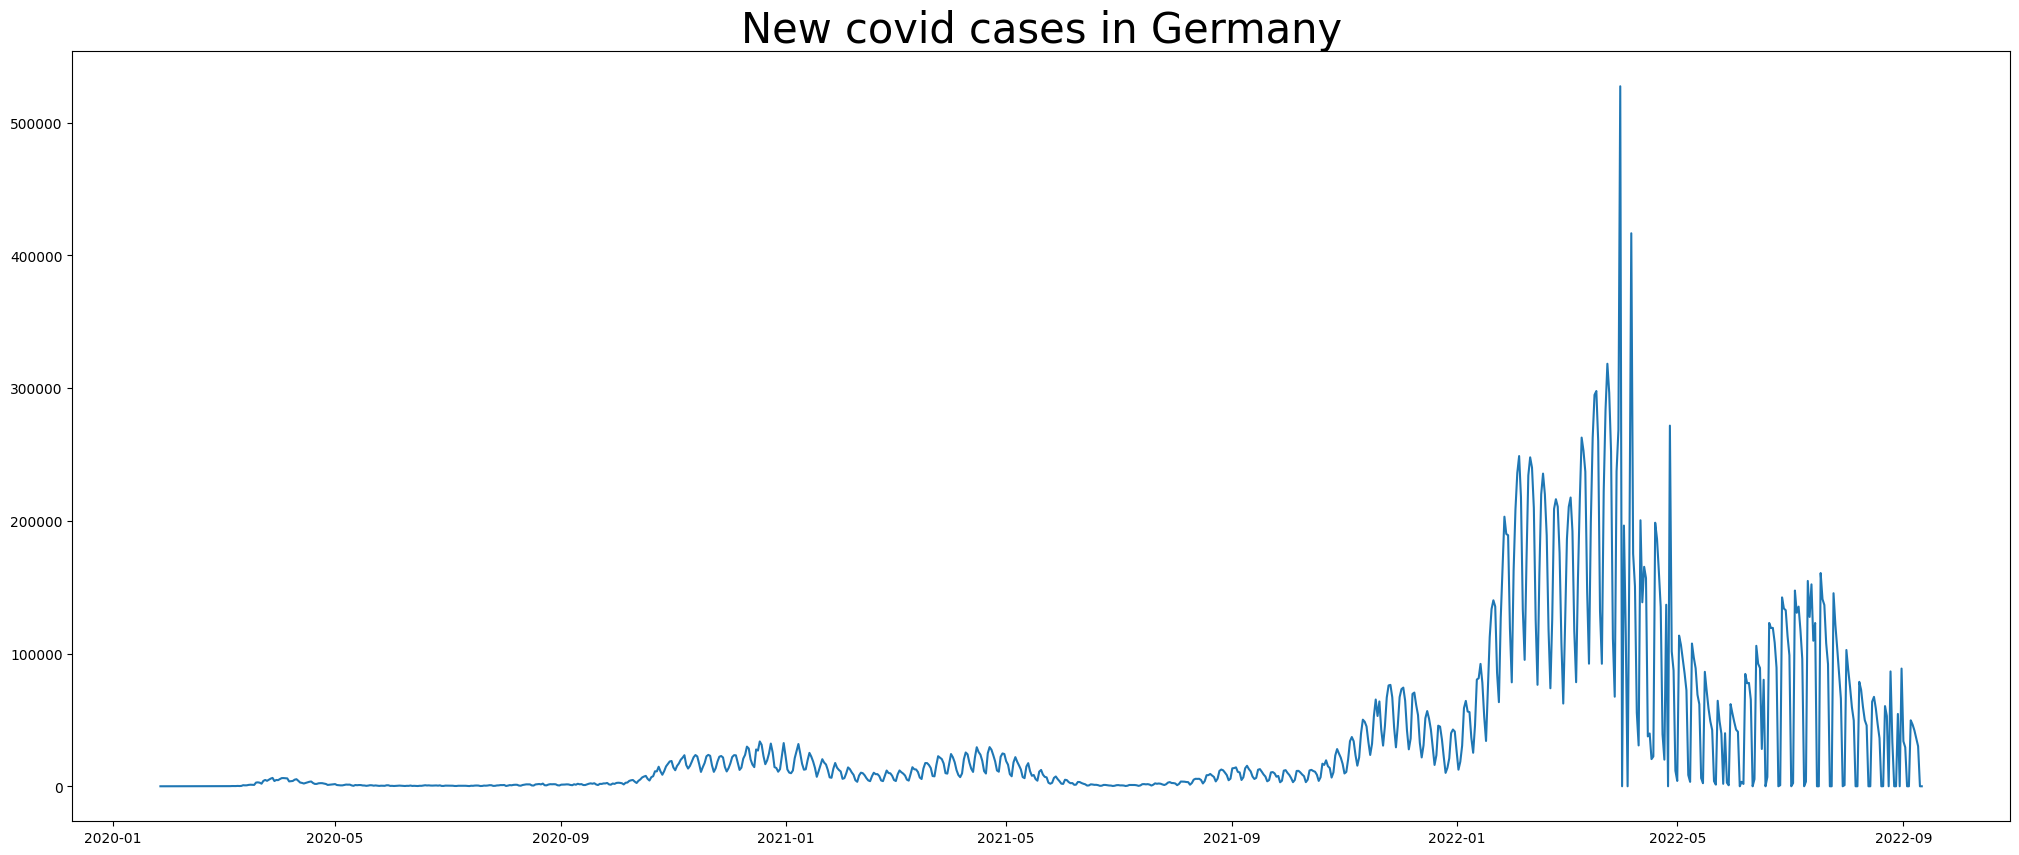

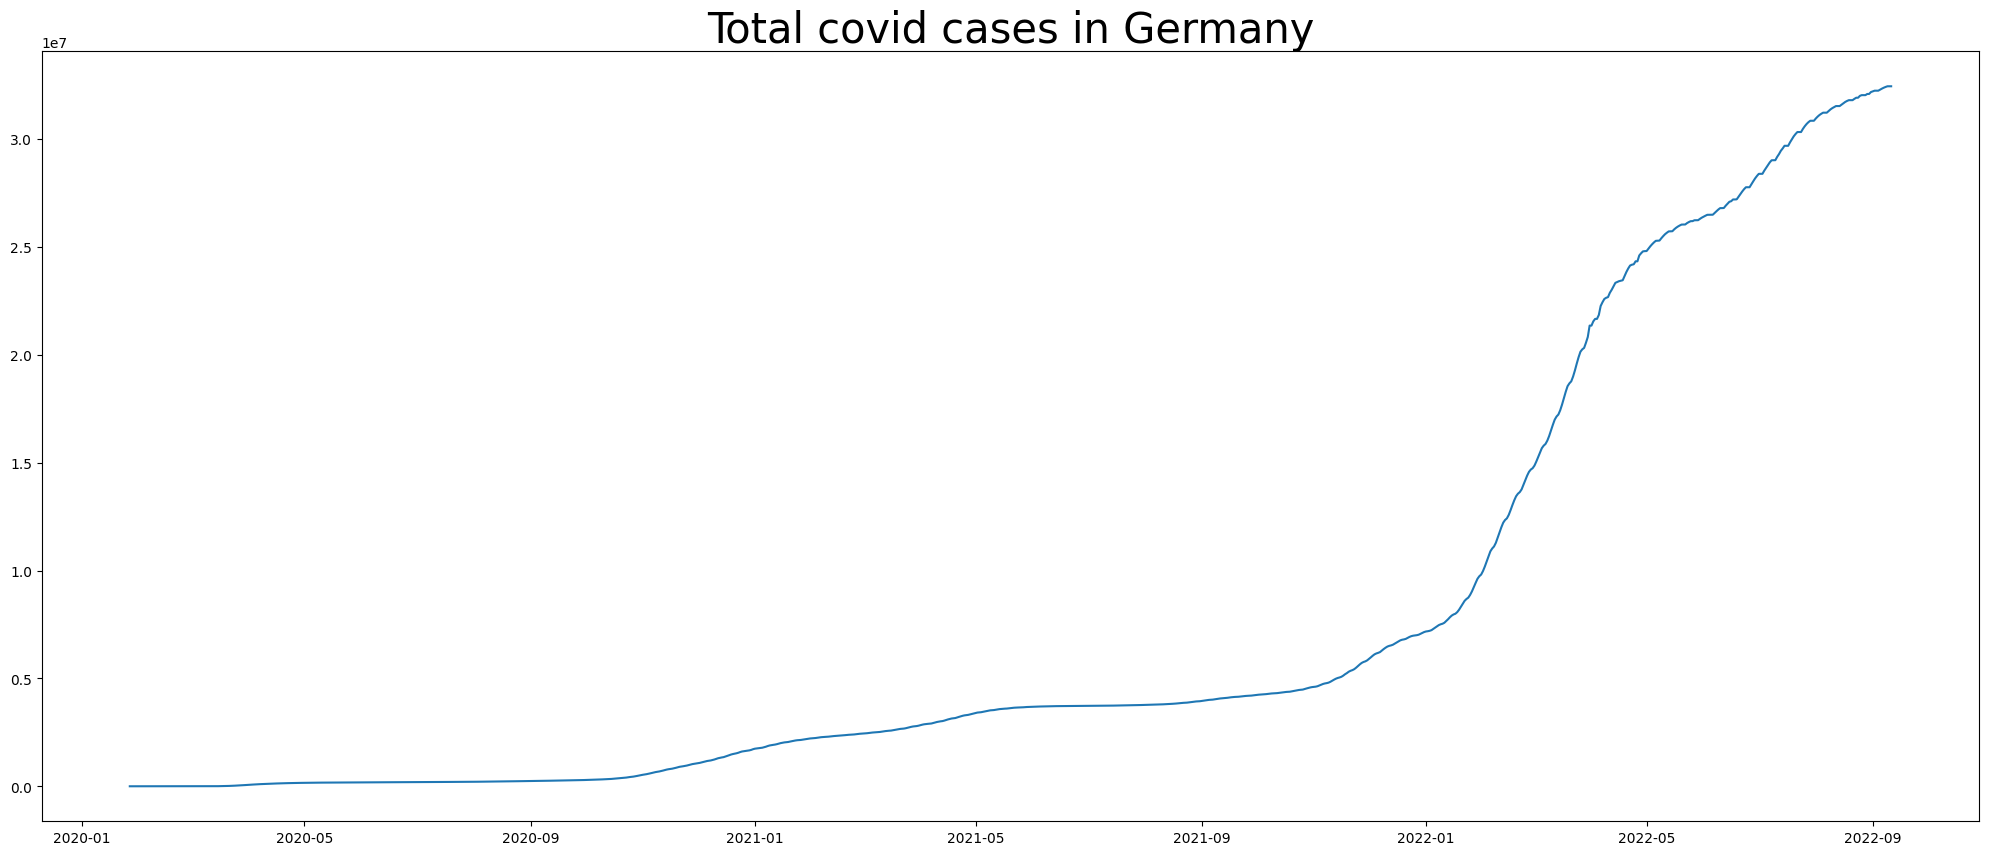

In [25]:
# Visualization new cases
x = country_indicator['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_indicator[['new_cases']]);
plt.title(f'New covid cases in {country}', fontsize=30);

# Visualization total cases
x = country_indicator['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_indicator[['total_cases']]);
plt.title(f'Total covid cases in {country}', fontsize=30);

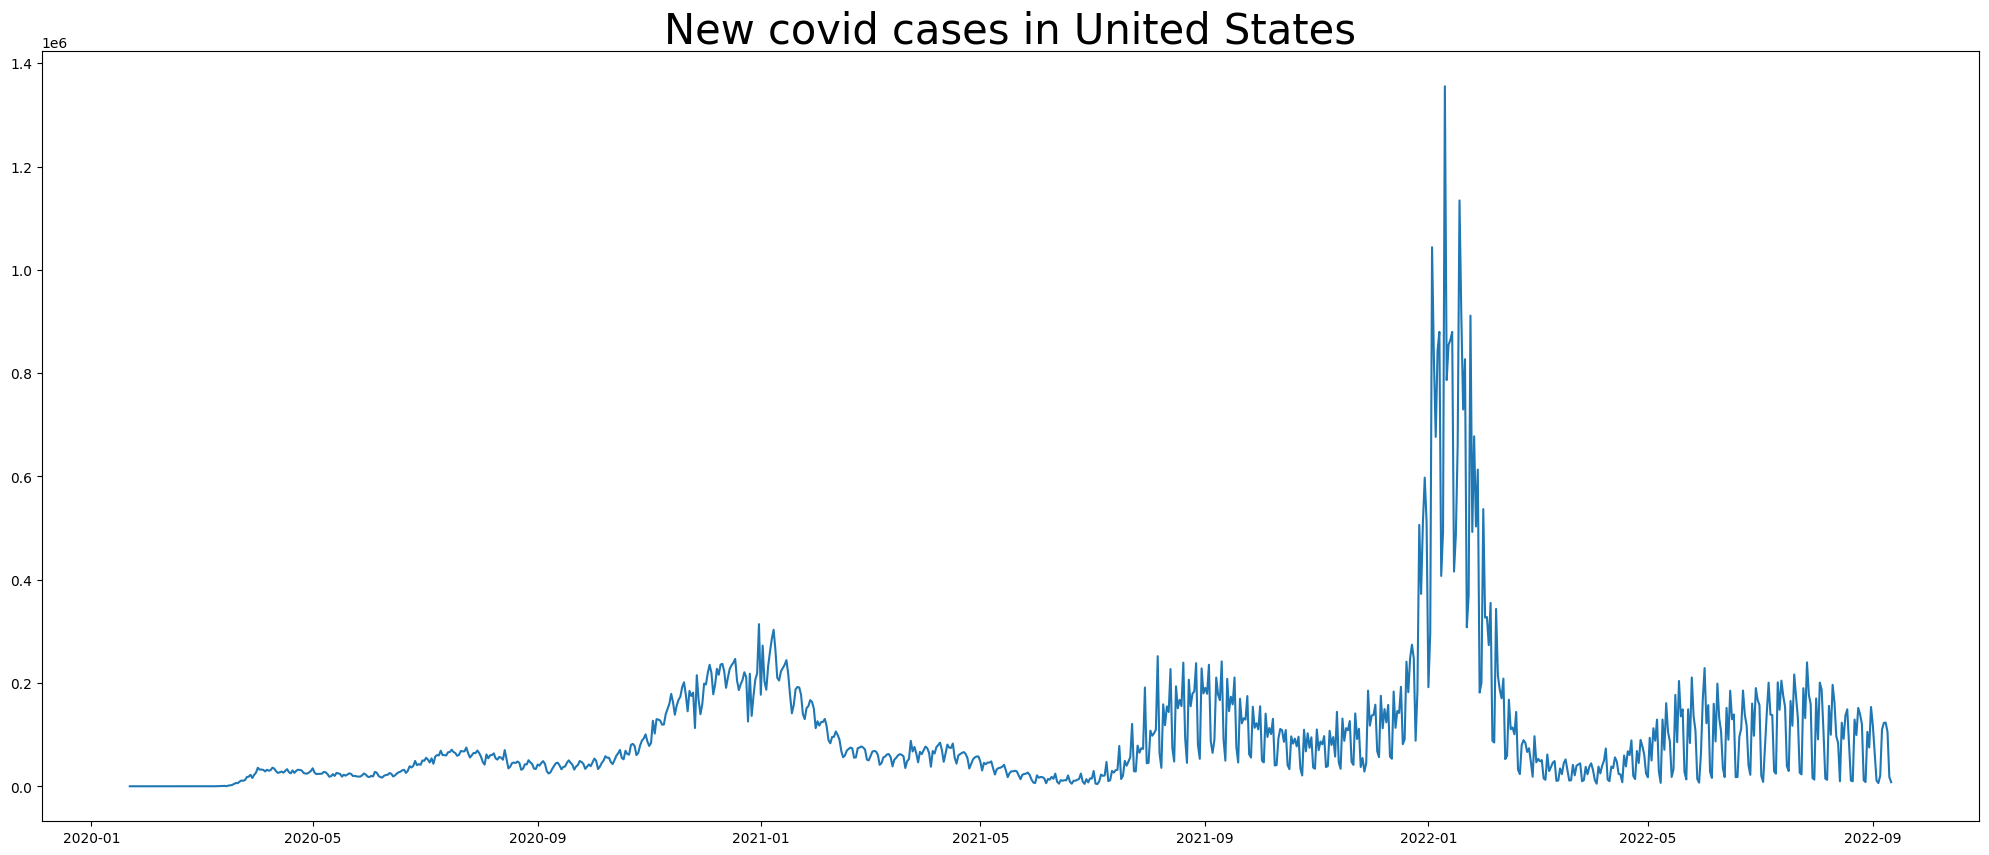

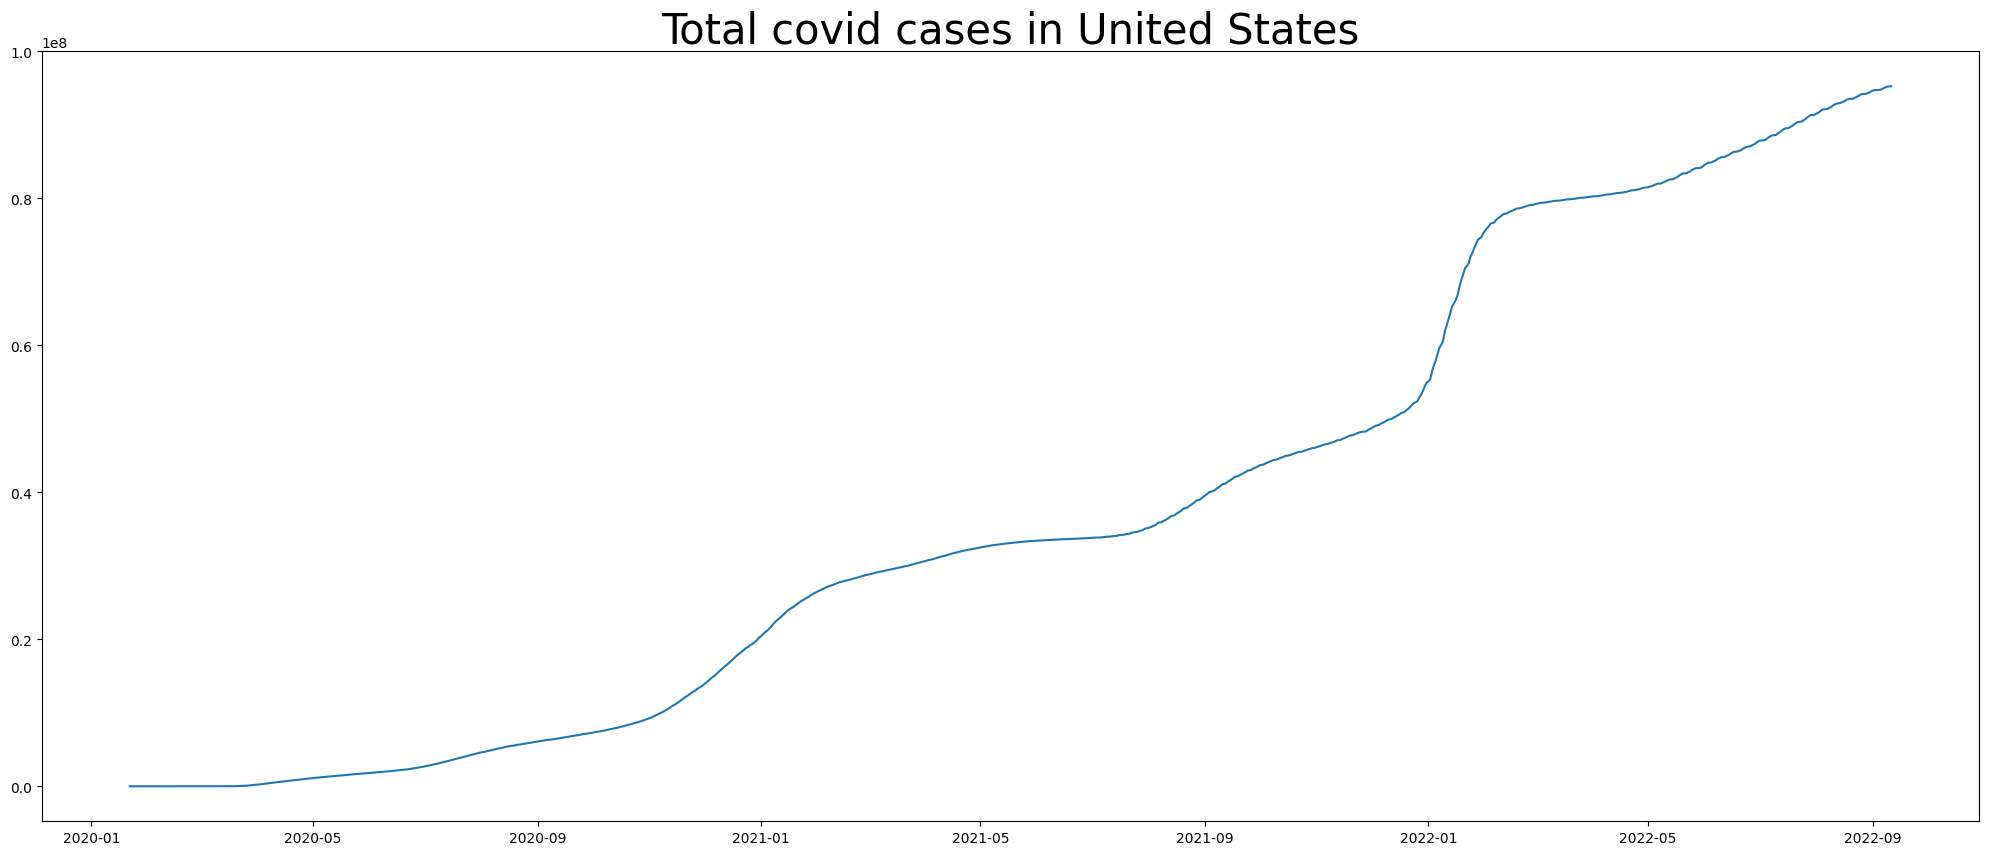

In [27]:
# Visualization new cases
x = country_indicator['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_indicator[['new_cases']]);
plt.title(f'New covid cases in {country}', fontsize=30);

# Visualization total cases
x = country_indicator['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_indicator[['total_cases']]);
plt.title(f'Total covid cases in {country}', fontsize=30);